# Exercise 2

## Exercise H2.2: Multilayer Perceptrons (MLP)

In [43]:
import numpy as np

def predict_y(x, w10, w21, b):
    return sum([w21[i] * np.tanh(w10[i] * x - b[i]) for i in range(len(w10))])

In [44]:
MLPs = []

N_MLPs = 50
N_hidden = 10
for i in np.arange(N_MLPs):
    w10 = np.random.normal(0, 2, N_hidden)
    w21 = np.random.normal(0, 1, N_hidden)
    b = np.random.uniform(-2, 2, N_hidden)
    params = [w10, w21, b]
    MLPs.append(params)

In [45]:
X = np.linspace(-2, 2, 1000)

In [46]:
predictions = []

for w10, w21, b in MLPs:
    y_pred = [predict_y(x, w10, w21, b) for x in X]
    predictions.append(y_pred)

predictions = np.array(predictions)

### Plot predictions

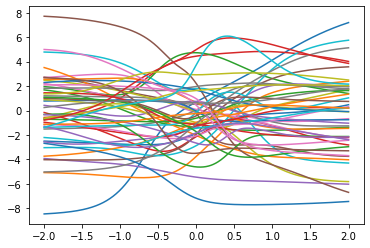

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for prediction in predictions:
    ax.plot(X, prediction)
    
plt.show()

### Different initialization

In [48]:
W10_alt = np.random.normal(0, 0.5, (N_MLPs, N_hidden))

In [49]:
predictions_alt = []

for i, params in enumerate(MLPs):
    w10, w21, b = params
    w10 = W10_alt[i]
    y_pred = [predict_y(x, w10, w21, b) for x in X]
    predictions_alt.append(y_pred)
    
predictions_alt = np.array(predictions_alt)

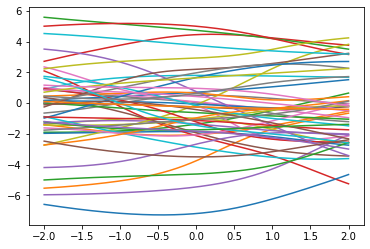

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for prediction in predictions_alt:
    ax.plot(X, prediction)
    
plt.show()

### MSE

In [51]:
Y = np.tile(-X, (50, 1))
mse = ((predictions - Y)**2).mean(axis=1)

In [52]:
mse

array([42.32708738, 23.4898349 ,  0.82971237, 18.68652485, 26.94300509,
        2.12436939,  1.01223073,  6.96178805,  2.67045062,  5.28470892,
        7.5482684 ,  3.77511796, 10.00347909,  4.9971909 , 10.14967188,
       18.54708883,  0.05446933,  0.1723169 ,  4.89629146, 21.17132132,
        0.33461419,  0.91486451,  4.50680514,  4.43480867,  0.95343692,
       19.56670383,  4.45748131,  5.40159449,  1.27203346,  4.26757353,
        1.98522362,  9.71888453,  6.80444649,  0.6284714 ,  3.10251964,
        2.08461177,  1.43320686, 24.48536896,  5.70520256,  6.67854053,
       36.10388336,  3.08429454,  3.16262821, 21.92978847,  6.12377415,
        4.07041484,  4.64653559,  2.87525263,  9.45832821, 14.56701058])

In [53]:
mse_alt = ((predictions_alt - Y)**2).mean(axis=1)

In [57]:
w_best = MLPs[np.argmin(mse)]

w_best_alt = MLPs[np.argmin(mse_alt)]
w_best_alt[0] = W10_alt[np.argmin(mse_alt)]

### Plot best MLPs

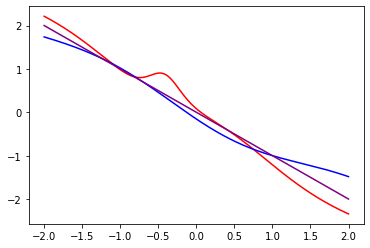

In [61]:
fig, ax = plt.subplots()

ax.plot(X, [predict_y(x, *w_best) for x in X], "r")
ax.plot(X, [predict_y(x, *w_best_alt) for x in X], "b")

ax.plot(X, [-x for x in X], "purple")